# OASIS INFOBYTE DATASCIENCE INTERNSHIP
## TASK 2
### PIYASA BERA
#### SALES PREDICTION USING PYTHON

In [137]:
#importing the needed libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [138]:
#reading the dataset

df = pd.read_csv('advertising.csv')

In [139]:
#showing the dataset

df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [140]:
#first 5 rows of the dataset

df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [141]:
#last 5 rows of the dataset

df.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [142]:
#information of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [143]:
#shape of the dataset

df.shape

(200, 5)

In [144]:
#As we dont5 need the first column(Unnamed) we are removing the column

df = df.iloc[:,1:]

In [145]:
#after removing the first column our dataset looks like this

df.sample(10)

,TV,Radio,Newspaper,Sales
56,7.3,28.1,41.4,5.5
62,239.3,15.5,27.3,15.7
41,177.0,33.4,38.7,17.1
118,125.7,36.9,79.2,15.9
137,273.7,28.9,59.7,20.8
174,222.4,3.4,13.1,11.5
48,227.2,15.8,49.9,14.8
0,230.1,37.8,69.2,22.1
70,199.1,30.6,38.7,18.3
153,171.3,39.7,37.7,19.0


In [146]:
#Checking is there any null values in the dataset

df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [147]:
#describing the statistical part

df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [148]:
#removing the outlier

df = df[df["Newspaper"] <= 100]

In [149]:
df.shape

(198, 4)

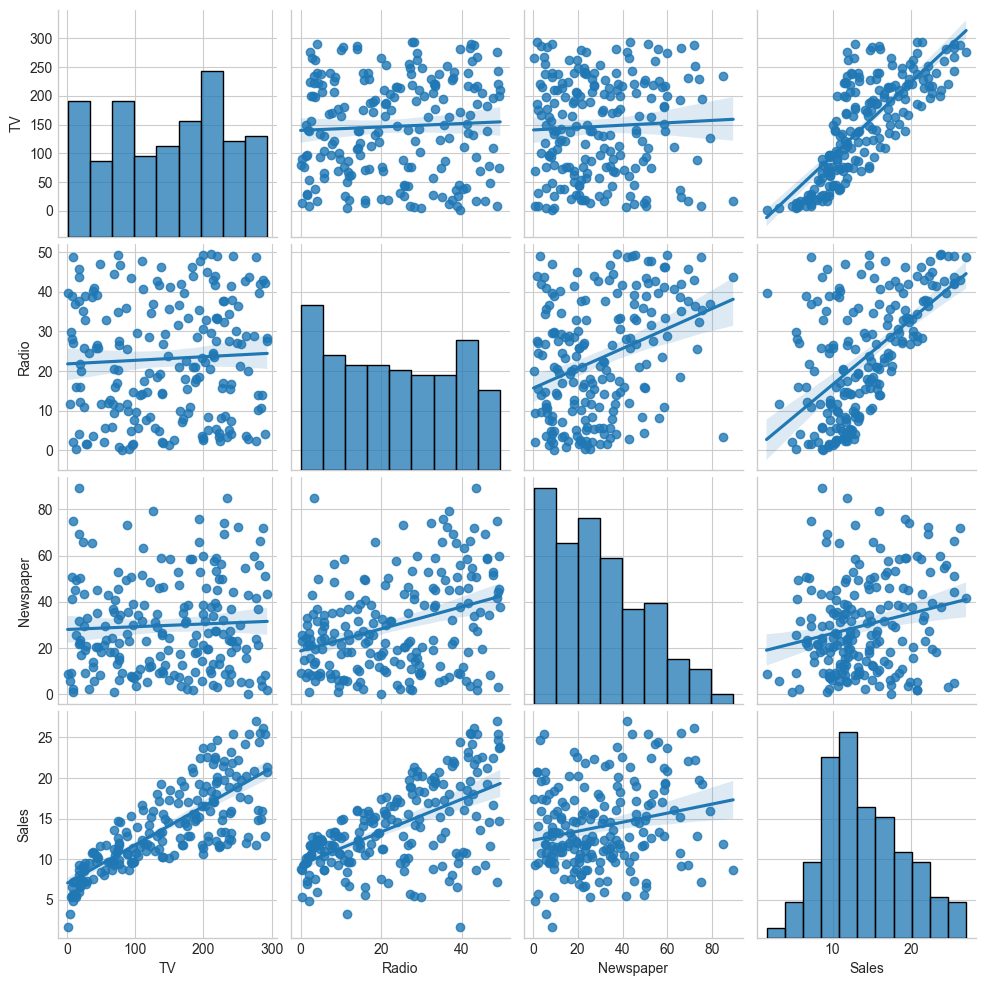

In [150]:
# Data visualization

sns.pairplot(df,kind="reg")

C:\Users\piyas\AppData\Local\Temp\ipykernel_19284\1677444173.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


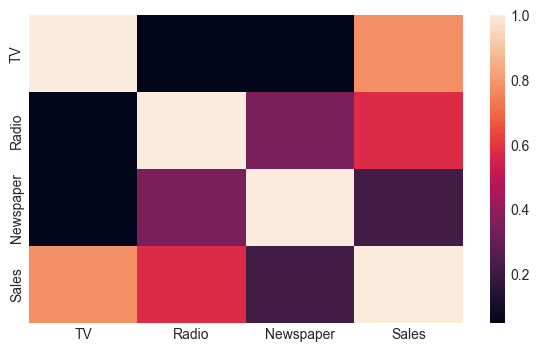

In [151]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(7,4))
sns.heatmap(df.corr())
plt.show()

In [152]:
#Separating input and output data

x = df.drop(columns = ['Sales'])
y = df['Sales']

In [153]:
x.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [154]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

In [155]:
#importiong libraries from sklearn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  r2_score

In [156]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [157]:
x_train.head()

,TV,Radio,Newspaper
167,206.8,5.2,19.4
17,281.4,39.6,55.8
162,188.4,18.1,25.6
112,175.7,15.4,2.4
171,164.5,20.9,47.4


In [158]:
model = LinearRegression()

In [159]:
model.fit(x_train, y_train)

LinearRegression()

In [160]:
y_pred = model.predict(x_test)

In [161]:
r2_score(y_test, y_pred)

0.9169740887318565

In [162]:
#Check our prediction

data = pd.DataFrame(data={"Predicted_Sales": y_pred.flatten()})
data

,Predicted_Sales
0,19.468683
1,5.885087
2,17.109976
3,23.309946
4,18.588959
5,11.568819
6,14.722381
7,17.506497
8,14.634125
9,11.218699


In [163]:
model.predict([[283.6, 42.0, 66.2]])

C:\Users\piyas\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([23.75532517])

In [164]:
#Saving the model

import pickle
pickle.dump(model,open('Sales.pkl','wb'))

In [ ]:
# THANK YOU